In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

pd.options.display.min_rows = 20

df = pd.read_csv('Titanic-train.csv')
len(df.columns)
column_names = df.columns[[1,2,4,5,6,7,9,11]]
column_names

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

<h4>Sprawdzamy ilość unikalnych elementów w poszczególnych kolumnach (atrybutach) oraz typ danych przechowywany w tej kolumnie.<br>
Czy mamy do czynienia ze zmiennymi kategorycznymi (jakościowymi), czy też numerycznymi (ilościowymi)</h4>

In [21]:
for col_name in df.columns:
    print(f'{col_name:12}- unikalne elementy: {len(df[col_name].unique()):^4}- typ[{df[col_name].dtype}]')

PassengerId - unikalne elementy: 891 - typ[int64]
Survived    - unikalne elementy:  2  - typ[int64]
Pclass      - unikalne elementy:  3  - typ[int64]
Name        - unikalne elementy: 891 - typ[object]
Sex         - unikalne elementy:  2  - typ[object]
Age         - unikalne elementy:  89 - typ[float64]
SibSp       - unikalne elementy:  7  - typ[int64]
Parch       - unikalne elementy:  7  - typ[int64]
Ticket      - unikalne elementy: 681 - typ[object]
Fare        - unikalne elementy: 248 - typ[float64]
Cabin       - unikalne elementy: 148 - typ[object]
Embarked    - unikalne elementy:  4  - typ[object]


In [65]:
def check_if_outlier(DF : pd.DataFrame, feature : str = '', degree = 2):
        """Funkcja zwracająca Prawdę lub Fausz w zależności czy element jest odstający.
        dane wejściowe - pd.DataFrame z wartościami numerycznymi. 
        dane wyjściowe pd.Series zwracający True i False."""
        std_dev = DF[feature].std()
        miu = DF[feature].mean()
        ret_val = []
        for elt in DF[feature]:
            if elt > miu + degree * std_dev or elt < miu - degree * std_dev:
                ret_val.append(True)
            else: 
                ret_val.append(False)
        return pd.Series(ret_val)

def opisz_dane (df: pd.DataFrame) -> pd.DataFrame:
    wiersze = ('wszystkie elementy','unikalne elementy', 'braki (NA/nan)', 'max', 'min', 'średnia arytmetyczna', 'mediana', 'moda',
    'ochylenie standardowe', 'ilosc elementów odstających')

    is_numeric = {column_name: True if ('int' in str(df[column_name].dtype)  or df[column_name].dtype =='float') else False for column_name in df.columns}
    all_items = {column_name : df[column_name].count() for column_name in df.columns}
    unique_items = {column_name : df[column_name].value_counts().count() for column_name in df.columns}
    brak_w_items = {column_name : sum(df[column_name].isna()) for column_name in df.columns}
    max_items = {column_name: df[column_name].max() if is_numeric[column_name] else pd.NA for column_name in df.columns}
    min_items = {column_name: df[column_name].min() if is_numeric[column_name] else pd.NA for column_name in df.columns}
    average_items = {column_name: df[column_name].mean() if is_numeric[column_name] else pd.NA for column_name in df.columns}
    median_items = {column_name: df[column_name].median() if is_numeric[column_name] else pd.NA for column_name in df.columns}
    mode_items = {column_name: df[column_name].mode() if is_numeric[column_name] else Counter(df[column_name]).most_common() \
    if len(Counter(df[column_name]).most_common()) < 3 else pd.NA for column_name in df.columns}
    std_deviation = {column_name: df[column_name].std() if is_numeric[column_name] else pd.NA for column_name in df.columns}

    outliers = {column_name: check_if_outlier(df, column_name).sum() if is_numeric[column_name] else pd.NA for column_name in df.columns}

    serie= [all_items, unique_items, brak_w_items, max_items, 
    min_items, average_items,median_items,mode_items,std_deviation,outliers]

#    print(pd.DataFrame(serie, index = wiersze))
    return pd.DataFrame(serie, index = wiersze)

In [66]:
df = df.astype({'Survived' : 'category', 'Pclass' : 'category'})
df = df.drop(columns= 'Name')
opisz_dane(df)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
wszystkie elementy,891,891,891,891,714,891,891,891,891,204,889
unikalne elementy,891,2,3,2,88,7,7,681,248,147,3
braki (NA/nan),0,0,0,0,177,0,0,0,0,687,2
max,891,<NA>,<NA>,<NA>,80.0,8,6,<NA>,512.3292,<NA>,<NA>
min,1,<NA>,<NA>,<NA>,0.42,0,0,<NA>,0.0,<NA>,<NA>
średnia arytmetyczna,446.0,<NA>,<NA>,<NA>,29.699118,0.523008,0.381594,<NA>,32.204208,<NA>,<NA>
mediana,446.0,<NA>,<NA>,<NA>,28.0,0.0,0.0,<NA>,14.4542,<NA>,<NA>
moda,0 1 1 2 2 3 3 4 4 ...,"[(0, 549), (1, 342)]",<NA>,"[(male, 577), (female, 314)]",0 24.0 dtype: float64,0 0 dtype: int64,0 0 dtype: int64,<NA>,0 8.05 dtype: float64,<NA>,<NA>
ochylenie standardowe,257.353842,<NA>,<NA>,<NA>,14.526497,1.102743,0.806057,<NA>,49.693429,<NA>,<NA>
ilosc elementów odstających,0,<NA>,<NA>,<NA>,29,46,95,<NA>,38,<NA>,<NA>


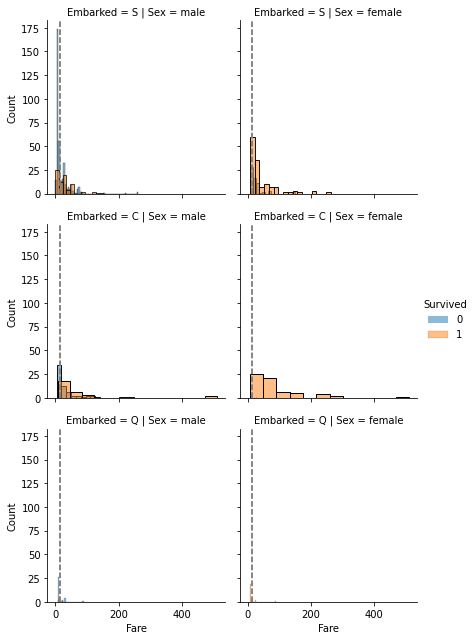

In [24]:
sijatka = sns.FacetGrid(df,col = 'Sex', row = 'Embarked',hue = 'Survived',)
sijatka.map_dataframe(sns.histplot, x = 'Fare', multiple = 'layer', alpha = 0.5, )
sijatka.refline(x=df["Fare"].median())
sijatka.add_legend()

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


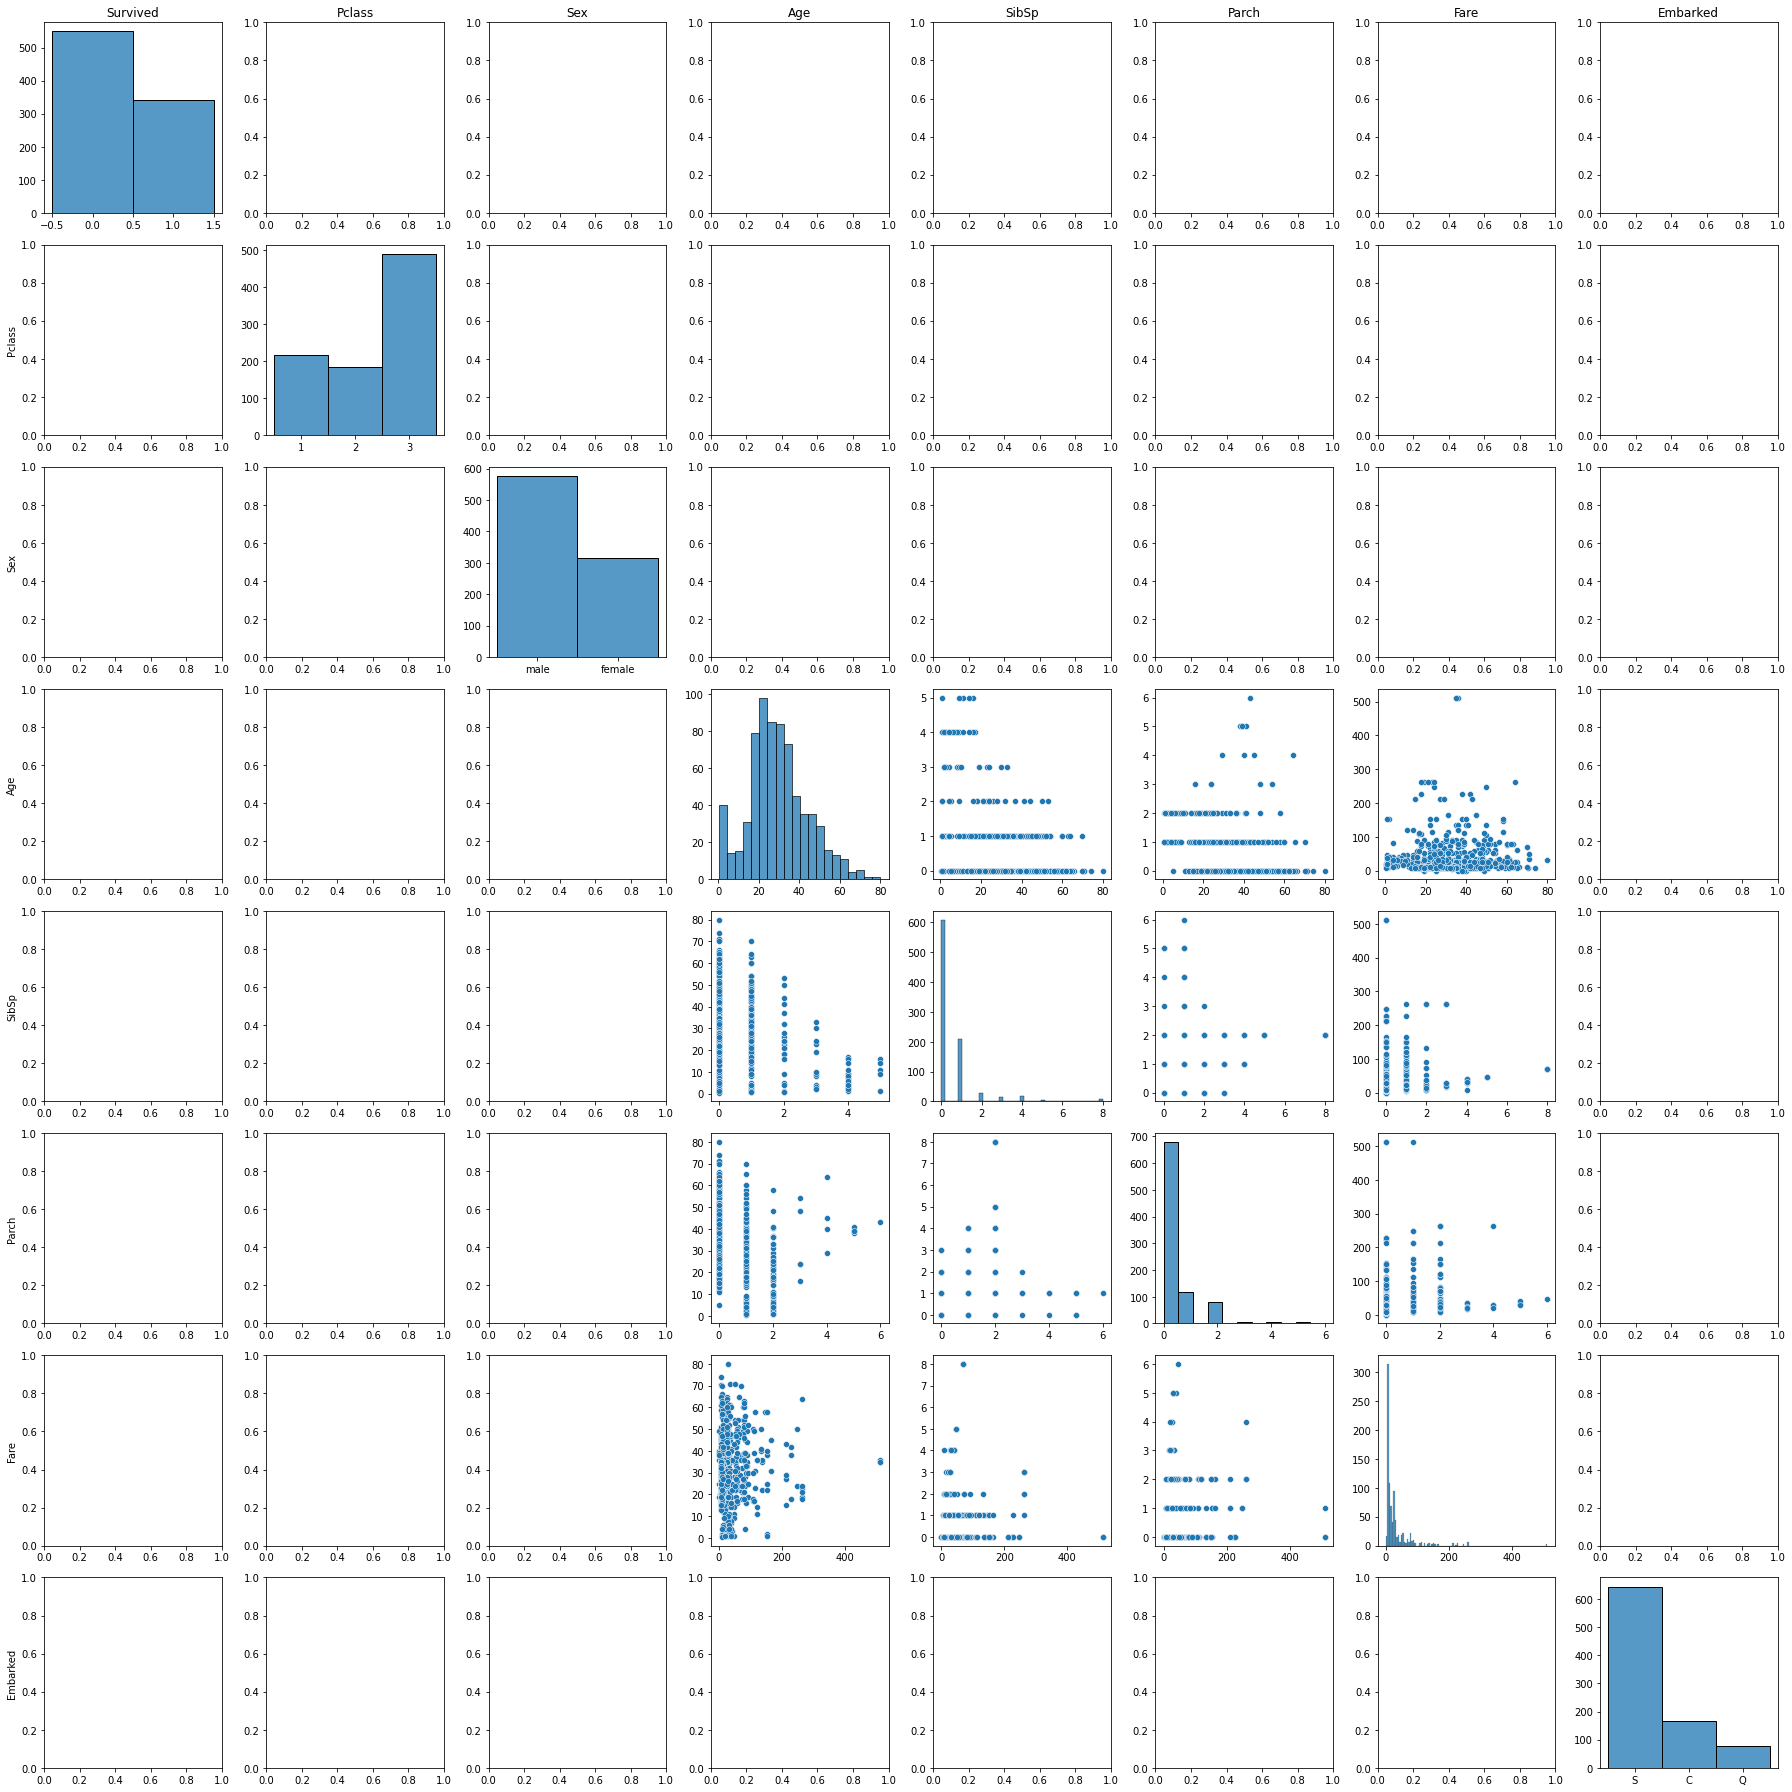

In [77]:
def czy_numeryczna(s: pd.Series):
    ret_val = False
    if 'int' in str(s.dtype) or s.dtype == 'float':
        ret_val = True
    return ret_val

def jaki_plot(r: pd.Series, c: pd.Series):
    match czy_numeryczna(r), czy_numeryczna(c):
        case True, True:
            return 'scatter'
        case False, False:
            return 'hitmapa'
        case False, True:
            return 'h_bar'
        case True, False:
            return 'box_plot'


def ladny_plot(DF: pd.DataFrame):
    col_names = DF.columns
    print(col_names)

    fig, ax = plt.subplots(nrows = DF.shape[1],ncols = DF.shape[1],figsize=(25,25), tight_layout = True)

    for a, c in zip(ax[0], col_names):
        a.set_title(c)
    for a, c in zip(ax[:,0], col_names):
        a.set_ylabel(c)

    for row_id, row_name in enumerate(column_names):
        for col_id, col_name in enumerate(column_names):
            #print(f'{row_id:^3} {row_name:^10} - {col_id:^3} {col_name:^10} {czy_numeryczna(DF[row_name]):^7} {czy_numeryczna(DF[col_name]):^7} {jaki_plot(DF[row_name],DF[col_name])}')
            
            if row_id == col_id:
                sns.histplot(data = DF[row_name], ax = ax[row_id, col_id]).set(xlabel=None, ylabel = None)
                continue
            if (czy_numeryczna(DF[row_name]), czy_numeryczna(DF[col_name])) == (True, True):
                sns.scatterplot(x = DF[row_name], y = DF[col_name], ax=ax[row_id, col_id]).set(xlabel=None,ylabel = None)
    fig.tight_layout()
    plt.show()
ladny_plot(df[column_names])
